In [12]:
import networkx as nx # librería de análisis de redes
import numpy as np # librería de computación numérica
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
%matplotlib inline

In [13]:
Gb=nx.read_gexf("internet_routers-22july06-2.gexf")

In [14]:
#Numero de nodos y enlaces
print('Nodos=%i,Enlaces=%i' % (Gb.number_of_nodes(),Gb.number_of_edges()))
#Grado
degrees = np.array([x[1] for x in Gb.degree()])
print("Grado maximo", max(degrees))
print("Grado mínimo", min(degrees))
print("Grado medio" , sum(degrees)/len(degrees))

Nodos=22963,Enlaces=48436
Grado maximo 2390
Grado mínimo 1
Grado medio 4.218612550624918


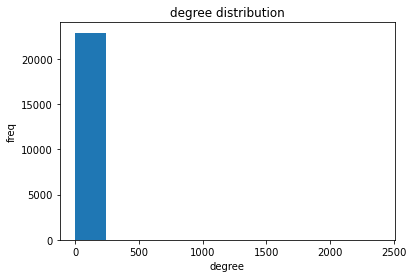

In [15]:
#Histograma con escala lineal
plt.hist(degrees,density=False)
plt.xlabel('degree');
plt.ylabel('freq');
plt.title('degree distribution');

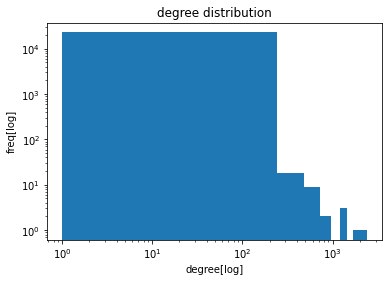

In [16]:
#Histograma con escala logarítmica
plt.hist(degrees,density=False);
plt.xlabel('degree[log]');
plt.ylabel('freq[log]');
plt.title('degree distribution');
plt.xscale('log');
plt.yscale('log');
#Se visualiza mejor en escala logarítmica

[ 223    1 2016 ...    2    2    1]


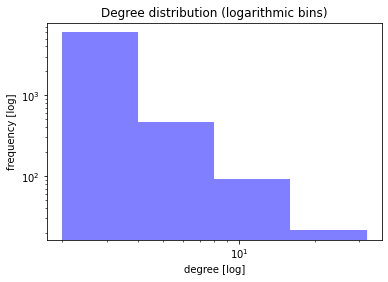

In [17]:
#Clases para la distribución de grado
clases=np.array([2**x for x in range(1,6)])

# Rango de las clases para normalizar
rango=clases[1:]-clases[:-1]
print(degrees)
(n,x)=np.histogram(degrees,bins=clases) # n (frecuencia), x (clases)
# Normalizamos n (frecuencia)
n=n/rango
plt.bar(x[:-1],n,width=rango,facecolor='blue', alpha=0.5,align='edge')
plt.yscale('log');
plt.xscale('log');
plt.xlabel('degree [log]');
plt.ylabel('frequency [log]');
plt.title('Degree distribution (logarithmic bins)');

In [7]:
# Ajuste de una recta a los valores
slope, intercept, r_value, p_value, std_err = linregress(x[0:-1],n)
print('Valor R2: %.4f, p-valor: %.4f' %(r_value,p_value))

Valor R2: -0.6369, p-valor: 0.3631


In [47]:
#Obtenemos el array RI/n
dfP = pd.DataFrame(degrees, columns = ['k'])
dfP = dfP.sort_values(by=['k'], ascending=False)
numRank = range(1,len(degrees)+1)
dfP["ri"] = numRank
dfP["ri/n"] = dfP["ri"]/len(degrees)
riN = np.array(dfP["ri/n"])

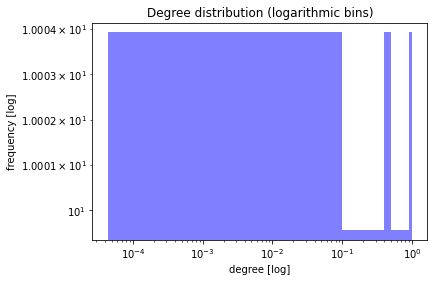

In [44]:
#Creamos el histograma para la distribución
(n,x)=np.histogram(riN,density=True) 
rango=x[1:]-x[:-1]
n = n / rango
plt.bar(x[:-1],n,width=rango,facecolor='blue', alpha=0.5,align='edge')
plt.yscale('log');
plt.xscale('log');
plt.xlabel('degree [log]');
plt.ylabel('frequency [log]');
plt.title('Degree distribution (logarithmic bins)');

In [46]:
#Obtenemos la pendiente, alpha y el R2 
slope, intercept, r_value, p_value, std_err = linregress(x[0:-1],n)
alpha = -(slope-1)
print('Pendiente %.4f, alpha: %.4f ,R2: %.4f' %(slope,alpha,r_value))

Pendiente -0.0003, alpha: 1.0003 ,R2: -0.0380
